# CS 7641 HW1 Code - Supervised Learning

This file will provide analysis for 5 different classification algorithms for two datasets.

Datasets: Diabetes dataset and Breast cancer wisconsin (diagnostic) dataset.

Classification Algorithms: Decision Tree, Neural Network, Boosting, SVM, KNN.

There will be two outputs for each model: Both plots will be generated after hyperparameter tuning is performed.

# SKLearn Diabetes Dataset

In [1]:
import pandas as pd  #for data manipulation.
import numpy as np   #for scientific computing.
import sklearn       #for machine learning
import seaborn as sns #visualization package
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn import metrics as mt
import timeit
import matplotlib.pyplot as plt #plotting & visualization. 
%matplotlib inline  
#to present the visualizations as a part of the notebook itself
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
warnings.filterwarnings("ignore")

#### import the dataset & create a dataframe

In [2]:
#importing the inbuilt dataset in sklearn package for performing regression analysis.
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
breast_cancer = datasets.load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### Let us Create a Dataframe using this data

In [4]:
Diabetes_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
breast_cancer_df = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

# Add Dependent Variable to the dataset
Diabetes_df['target'] = diabetes.target
breast_cancer_df['target'] = breast_cancer.target

In [5]:
Diabetes_df.sample(5) 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
350,-0.027310,0.050680,0.060618,0.107944,0.012191,-0.017598,-0.002903,-0.002592,0.070211,0.135612,243.0
330,0.009016,0.050680,0.030440,0.042530,-0.002945,0.036890,-0.065491,0.071210,-0.023645,0.015491,244.0
62,-0.027310,0.050680,-0.007284,-0.040099,-0.011201,-0.013840,0.059685,-0.039493,-0.082381,-0.025930,52.0
100,0.016281,-0.044642,0.017506,-0.022885,0.060349,0.044406,0.030232,-0.002592,0.037232,-0.001078,128.0
356,-0.005515,0.050680,-0.033151,-0.015999,0.008063,0.016222,0.015505,-0.002592,-0.028320,-0.075636,54.0


In [6]:
breast_cancer_df.sample(5) 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
418,12.70,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.02402,0.1583,0.06275,...,16.92,88.12,566.9,0.13140,0.16070,0.09385,0.08224,0.2775,0.09464,1
523,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.03783,0.1714,0.06843,...,25.63,99.43,701.9,0.14250,0.25660,0.19350,0.12840,0.2849,0.09031,1
14,13.73,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,0.2069,0.07682,...,32.01,108.80,697.7,0.16510,0.77250,0.69430,0.22080,0.3596,0.14310,0
473,12.27,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,0.1701,0.05960,...,38.05,85.08,558.9,0.09422,0.05213,0.00000,0.00000,0.2409,0.06743,1
65,14.78,23.94,97.40,668.3,0.11720,0.14790,0.12670,0.09029,0.1953,0.06654,...,33.39,114.60,925.1,0.16480,0.34160,0.30240,0.16140,0.3321,0.08911,0


In [7]:
Diabetes_df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [8]:
breast_cancer_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

##### There are no missing values in the dataframe

<AxesSubplot:xlabel='target', ylabel='count'>

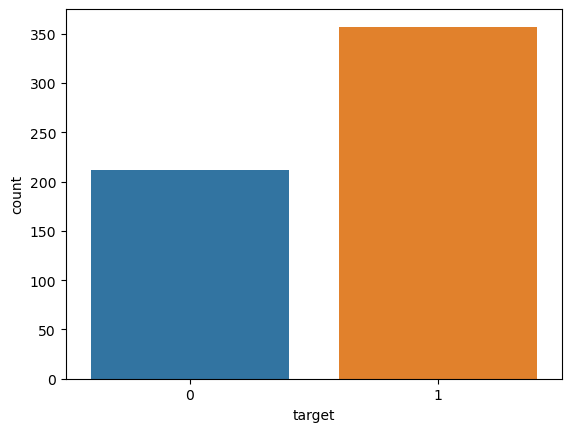

In [9]:
sns.countplot(breast_cancer_df["target"], label='count')

#### the dataset includes 357 diagnoses of benign tumors, and 212 diagnoses of malignant tumors

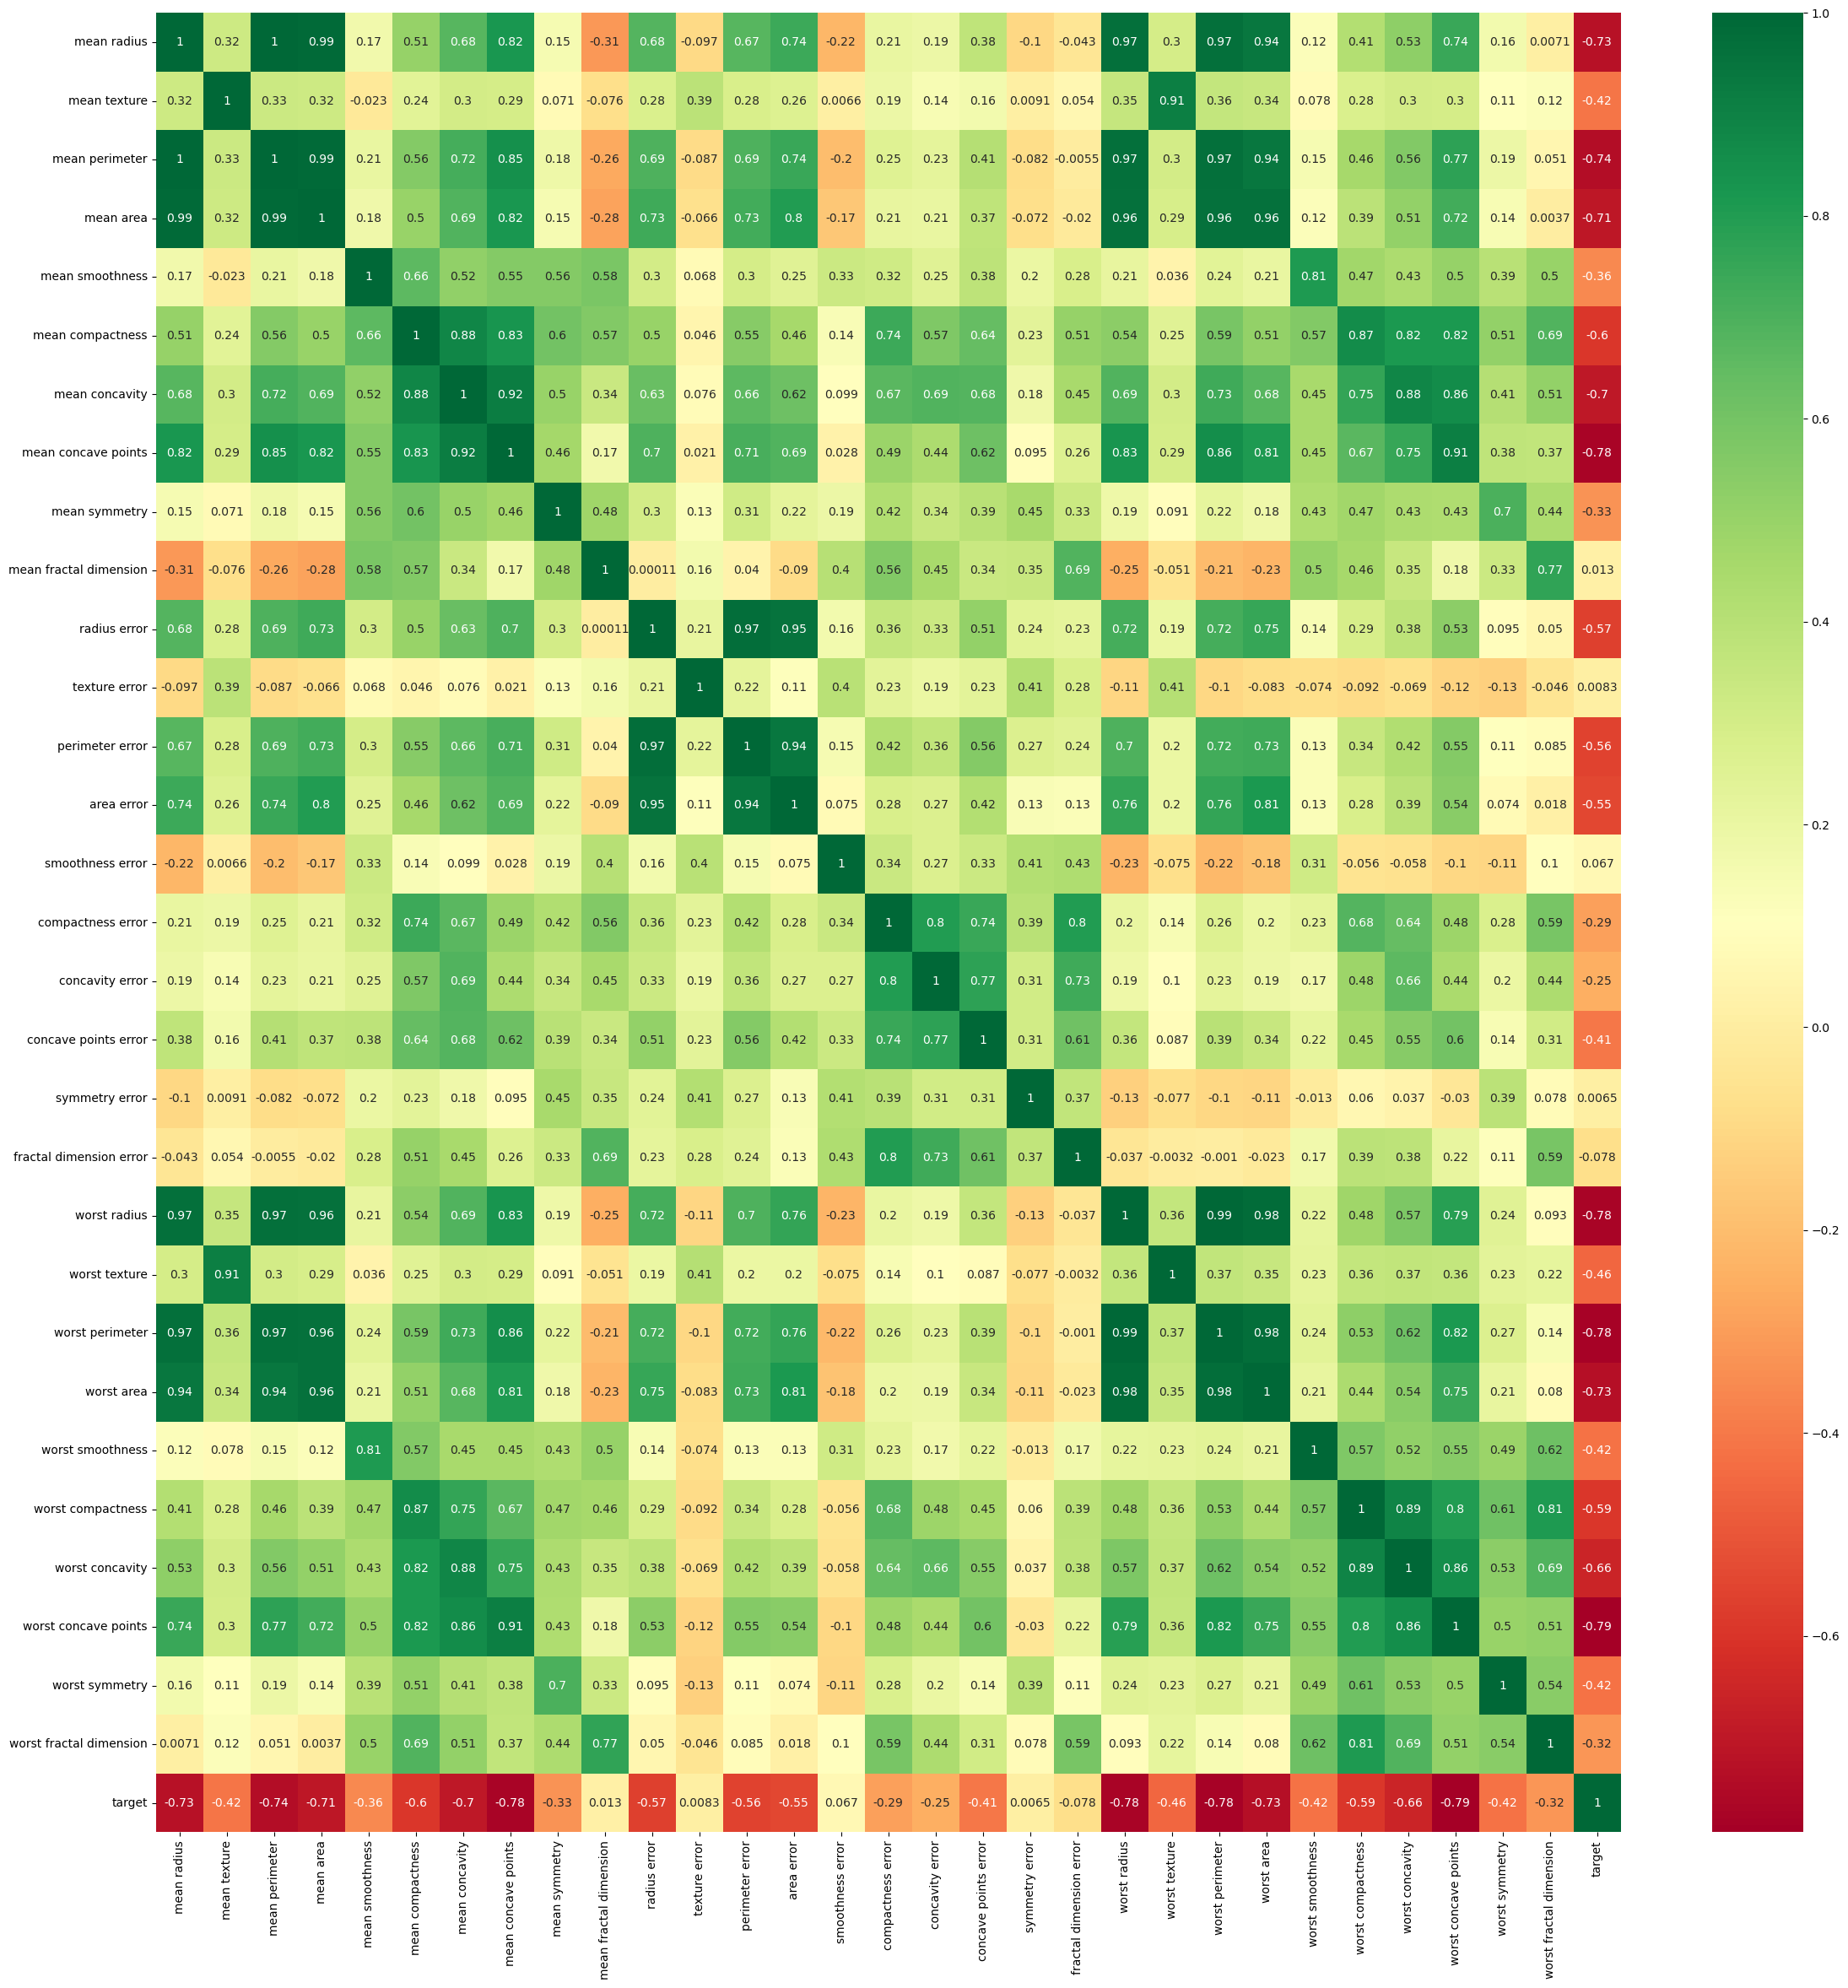

In [10]:
corr = breast_cancer_df.corr()
plt.subplots(figsize=(28,28))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

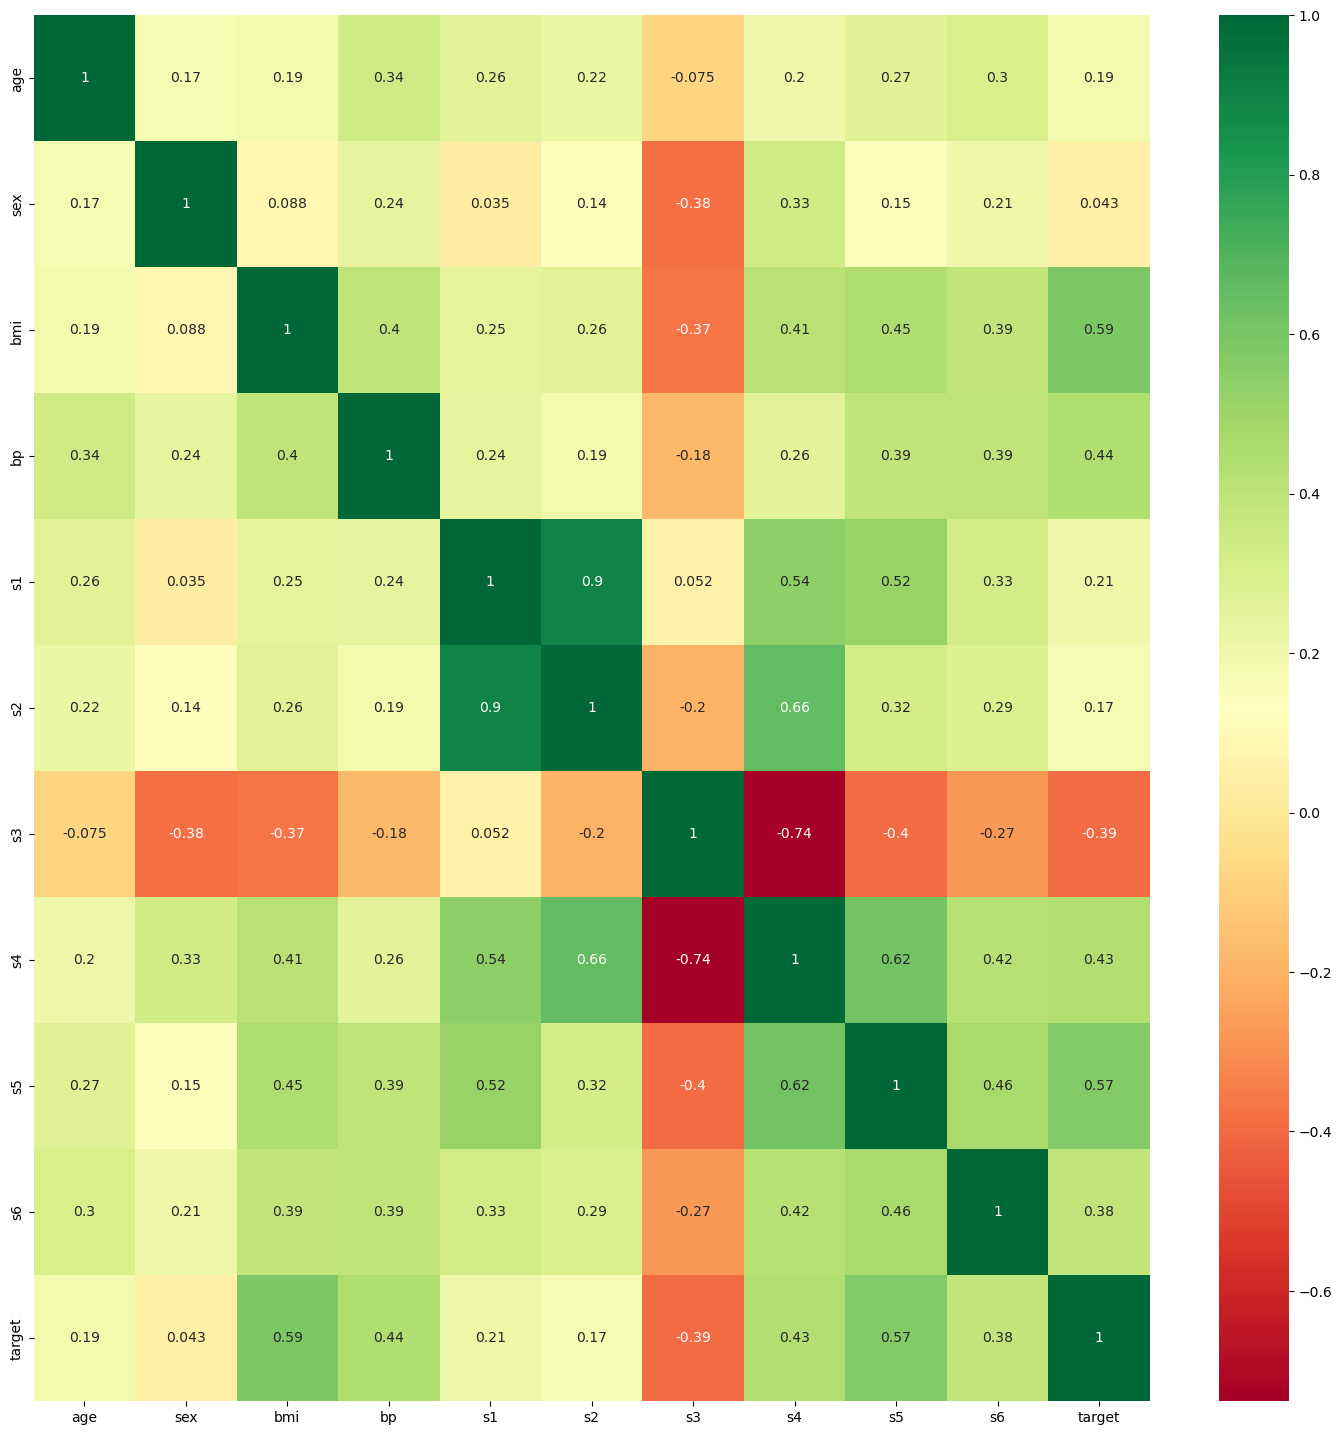

In [11]:
corr = Diabetes_df.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

# Helper Functions

In [12]:
def plot_learning_curve(clf, X, y):
    train_sizes, train_scores, test_scores = learning_curve(clf, X, y,
                                                                                           train_sizes=np.linspace(0.1, 1.0, 50))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.subplots(1, figsize=(10,10))
    plt.plot(train_sizes, train_mean, '--', color="b",  label="Training score")
    plt.plot(train_sizes, test_mean, color="r", label="testing score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

def perform_plot(L,x,y,title,ylabel,xlabel):
    plt.plot(L, x, 'o-', color='r', label='Test')
    plt.plot(L, y, 'o-', color = 'b', label='Train')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
def final_regression(clf, X_train, y_train, X_test, y_test):
      
    clf.fit(X_train, y_train);
    y_test_pred = clf.predict(X_test);

    print("1) The model explains,", np.round(mt.explained_variance_score(y_test,y_test_pred)*100,2),"% variance of the target w.r.t features is")
    print("2) The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(y_test,y_test_pred ),2))
    print("3) The R-Square score of the model is " , np.round(mt.r2_score(y_test,y_test_pred),2))    
    
def final_classification(clf, X_train, y_train, X_test, y_test):
    
    start_time = timeit.default_timer()
    clf.fit(X_train, y_train)
    end_time = timeit.default_timer()
    training_time = end_time - start_time
    
    start_time = timeit.default_timer()  
    y_test_pred = clf.predict(X_test)
    end_time = timeit.default_timer()
    pred_time = end_time - start_time
    
    auc = roc_auc_score(y_test, y_test_pred)
    f1 = f1_score(y_test,y_test_pred)
    accuracy = accuracy_score(y_test,y_test_pred)
    precision = precision_score(y_test,y_test_pred)
    recall = recall_score(y_test,y_test_pred)
    cm = confusion_matrix(y_test,y_test_pred)

    print("Model Evaluation Metrics Using Test Dataset")
    print("*****************************************************")
    print("F1 Score:  "+"{:.2f}".format(f1))
    print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
    print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
    print("Model Training Time (s):   "+"{:.5f}".format(training_time))
    print("Model Prediction Time (s): "+"{:.5f}\n".format(pred_time))
    print("*****************************************************")

    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred),
                                                    display_labels=clf.classes_)
    disp.plot()

# Decision tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

## Regression

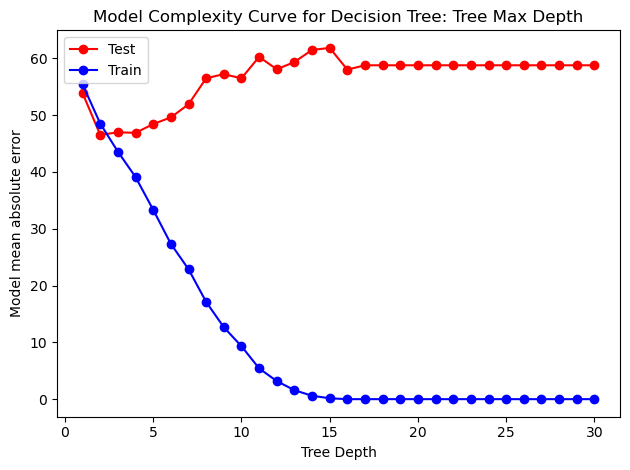

Per Hyperparameter tuning, best parameters are:
{'max_depth': 3, 'min_samples_leaf': 10}
1) The model explains, 40.45 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 45.32
3) The R-Square score of the model is  0.4


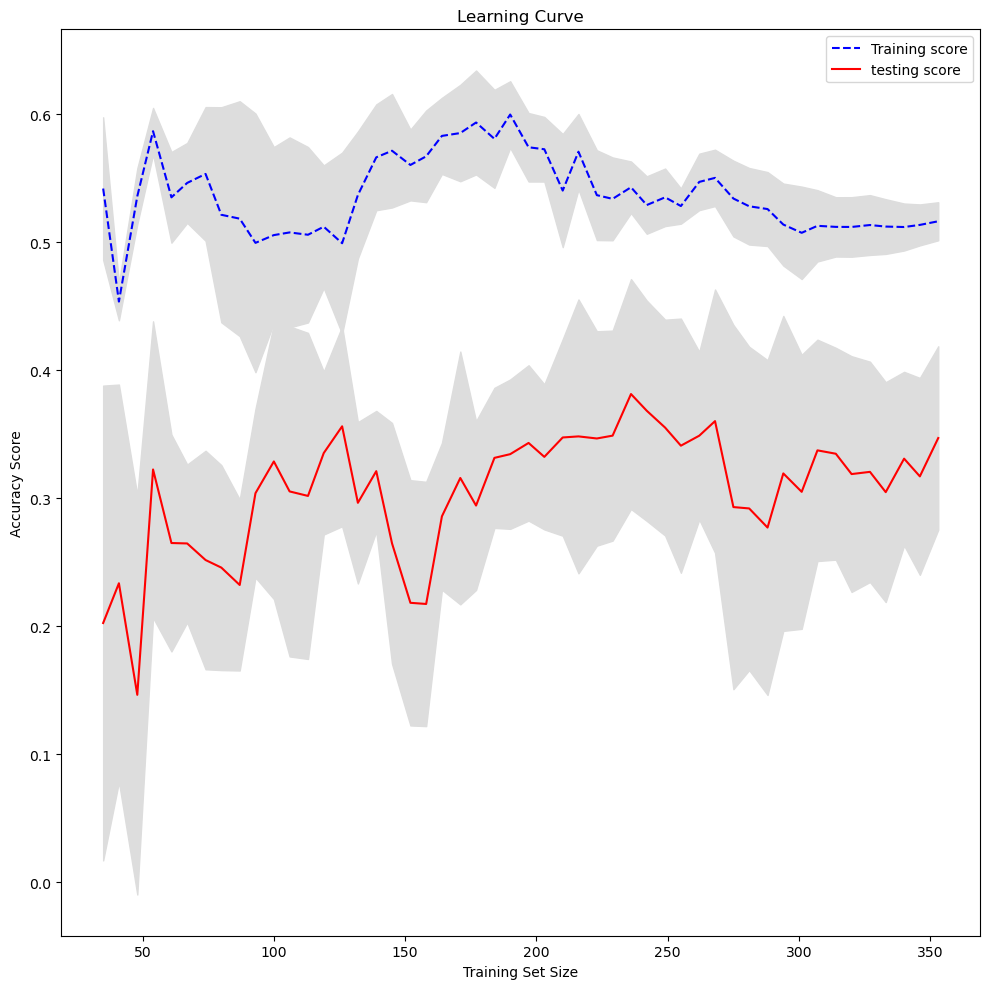

In [14]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split( diabetes.data,diabetes.target,shuffle=True,test_size=0.3, random_state=42)

test = []
train = []
depth = list(range(1,31))
for i in depth:         
        clf = DecisionTreeRegressor(max_depth=i, random_state=100, min_samples_leaf=1)
        clf.fit(X_train, y_train)
        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)
        test.append(np.round(mt.mean_absolute_error(y_test,y_pred_test ),2))
        train.append(np.round(mt.mean_absolute_error(y_train,y_pred_train ),2))
        
title="Model Complexity Curve for Decision Tree: Tree Max Depth"       
perform_plot(depth,test , train,title,'Model mean absolute error','Tree Depth')    

start_leaf_n = round(0.005*len(X_train))
end_leaf_n = round(0.05*len(X_train)) #leaf nodes of size [0.5%, 5% will be tested]     

param_grid = {'min_samples_leaf':np.linspace(start_leaf_n,end_leaf_n,20).round().astype('int'), 'max_depth':np.arange(1,20)}

tree = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid=param_grid, cv=10)
tree.fit(X_train, y_train)
print("Per Hyperparameter tuning, best parameters are:")
print(tree.best_params_)

Best_DT_Regressor = DecisionTreeRegressor(max_depth=tree.best_params_['max_depth'], 
                                                       min_samples_leaf=tree.best_params_['min_samples_leaf'], 
                                                       random_state=100)

final_regression(Best_DT_Regressor, X_train, y_train, X_test, y_test)
plot_learning_curve(Best_DT_Regressor, diabetes.data, diabetes.target)

## Classification

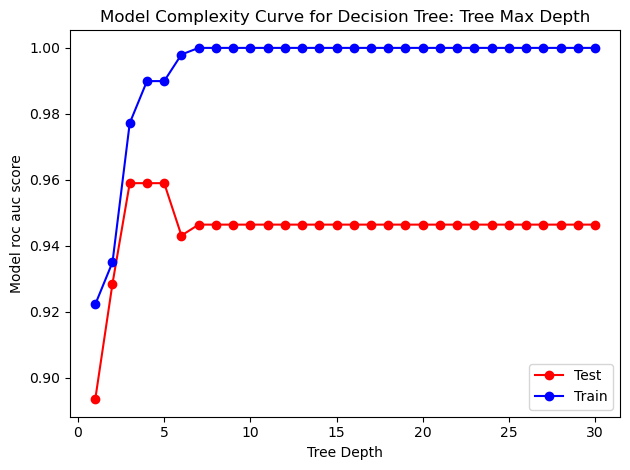

Per Hyperparameter tuning, best parameters are:
{'max_depth': 13, 'min_samples_leaf': 6}
Model Evaluation Metrics Using Test Dataset
*****************************************************
F1 Score:  0.98
Accuracy:  0.98     AUC:       0.97
Precision: 0.97     Recall:    0.99
Model Training Time (s):   0.00740
Model Prediction Time (s): 0.00044

*****************************************************


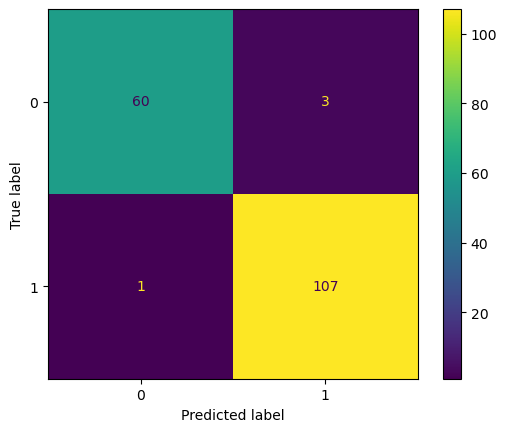

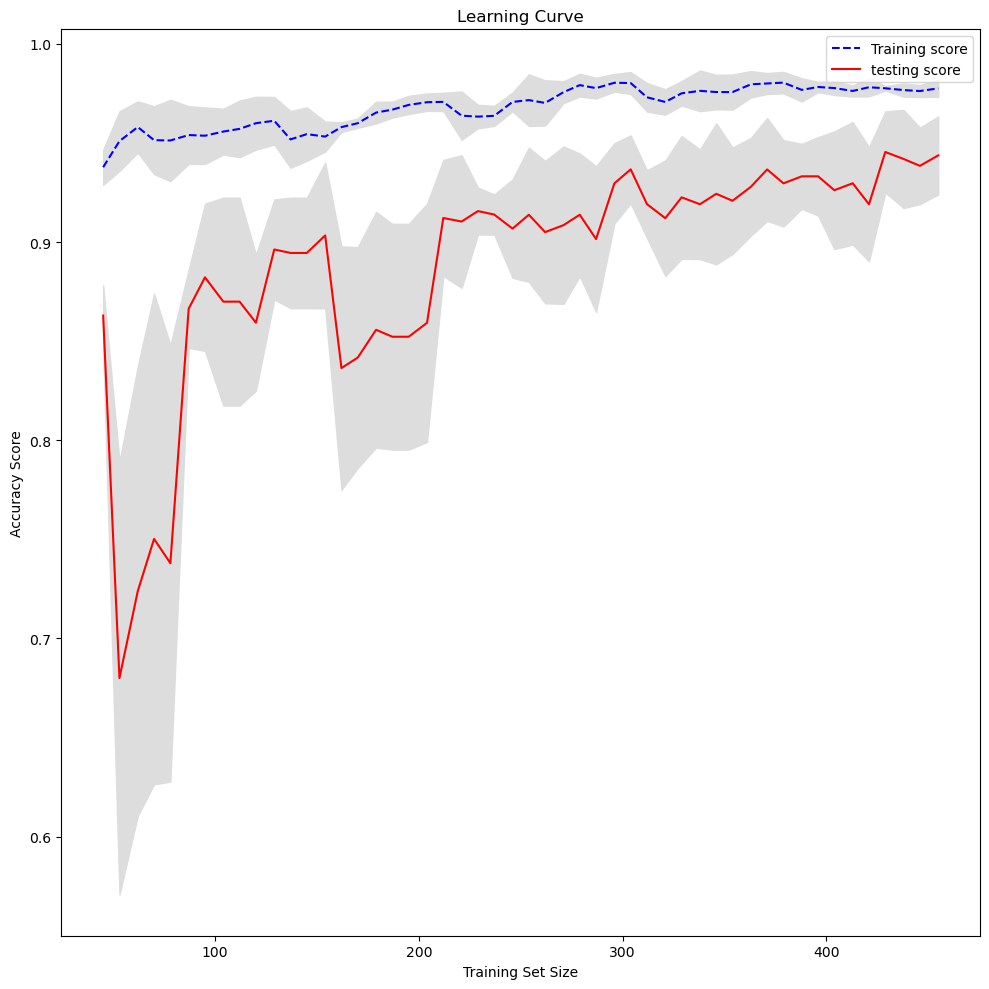

In [15]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data,breast_cancer.target,shuffle=True,test_size=0.3, random_state=42)

test = []
train = []
depth = list(range(1,31))
for i in depth:         
        clf = DecisionTreeClassifier(max_depth=i, random_state=100, min_samples_leaf=1, criterion='entropy')
        clf.fit(X_train, y_train)
        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)
        test.append(roc_auc_score(y_test, y_pred_test))
        train.append(roc_auc_score(y_train, y_pred_train))

title="Model Complexity Curve for Decision Tree: Tree Max Depth"       
perform_plot(depth, test,train,title,'Model roc auc score','Tree Depth')  

param_grid = {'min_samples_leaf':np.linspace(start_leaf_n,end_leaf_n,20).round().astype('int'), 'max_depth':np.arange(1,20)}

tree = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=param_grid, cv=10)
tree.fit(X_train, y_train)
print("Per Hyperparameter tuning, best parameters are:")
print(tree.best_params_)

Best_DT_Classifier = DecisionTreeClassifier(max_depth=tree.best_params_['max_depth'], 
                                                       min_samples_leaf=tree.best_params_['min_samples_leaf'], 
                                                       random_state=100, criterion='entropy')

final_classification(Best_DT_Classifier, X_train, y_train, X_test, y_test)
plot_learning_curve(Best_DT_Classifier, breast_cancer.data, breast_cancer.target)

# Neural networks

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

## Regression

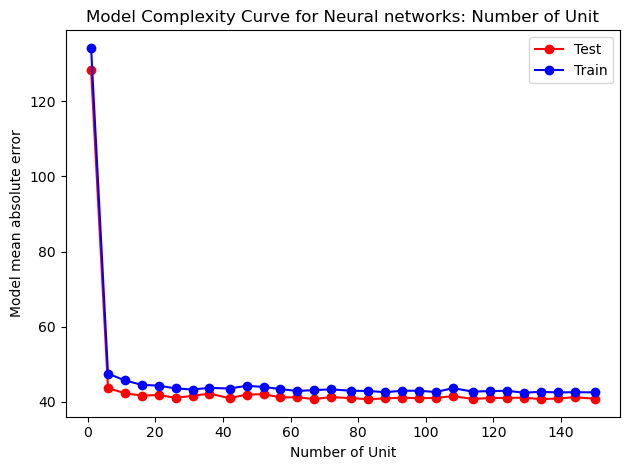

Per Hyperparameter tuning, best parameters are:
{'hidden_layer_sizes': 50, 'learning_rate_init': 0.1}
1) The model explains, 47.71 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 42.01
3) The R-Square score of the model is  0.47


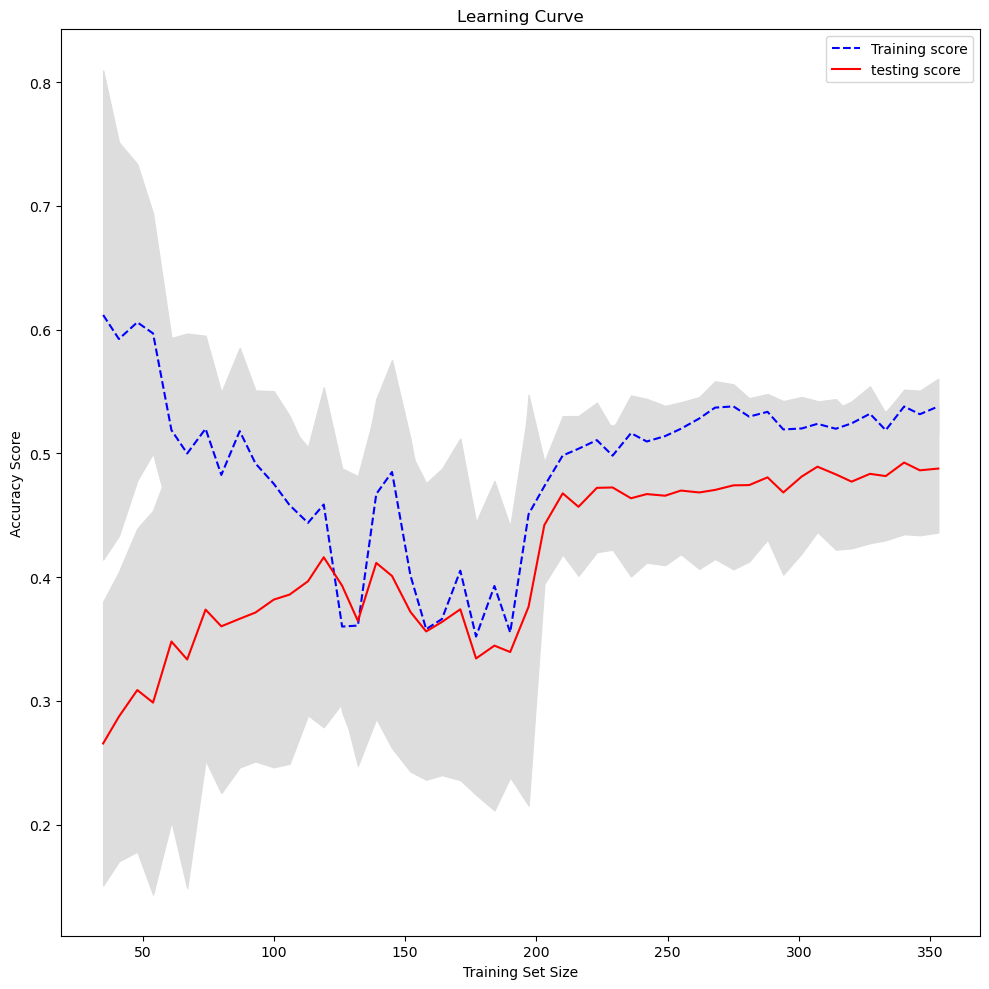

In [17]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,diabetes.target,shuffle=True,test_size=0.3, random_state=42)

test = []
train = []
hlist = np.linspace(1,150,30).astype('int')
for i in hlist:         
        clf = MLPRegressor(hidden_layer_sizes=(i,), 
                                       solver='adam', activation='relu', 
                                       learning_rate_init=0.05)
        clf.fit(X_train, y_train)
        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)
        test.append(np.round(mt.mean_absolute_error(y_test,y_pred_test ),2))
        train.append(np.round(mt.mean_absolute_error(y_train,y_pred_train ),2))

title="Model Complexity Curve for Neural networks: Number of Unit"       
perform_plot(hlist,test, train,title,'Model mean absolute error','Number of Unit')  

h_units = [5, 10, 20, 30, 40, 50, 75, 100]
learning_rates = [0.01, 0.05, .1]
param_grid = {'hidden_layer_sizes': h_units, 'learning_rate_init': learning_rates}

net = GridSearchCV(estimator = MLPRegressor(solver='adam',activation='relu'),
                                   param_grid=param_grid, cv=10)
net.fit(X_train, y_train)
print("Per Hyperparameter tuning, best parameters are:")
print(net.best_params_)

Best_NN_Regressor = MLPRegressor(hidden_layer_sizes=(net.best_params_['hidden_layer_sizes'],), 
                                                     solver='adam', activation='relu', 
                                                     learning_rate_init=net.best_params_['learning_rate_init'])

final_regression(Best_NN_Regressor, X_train, y_train, X_test, y_test)
plot_learning_curve(Best_NN_Regressor, diabetes.data, diabetes.target)

## Classification

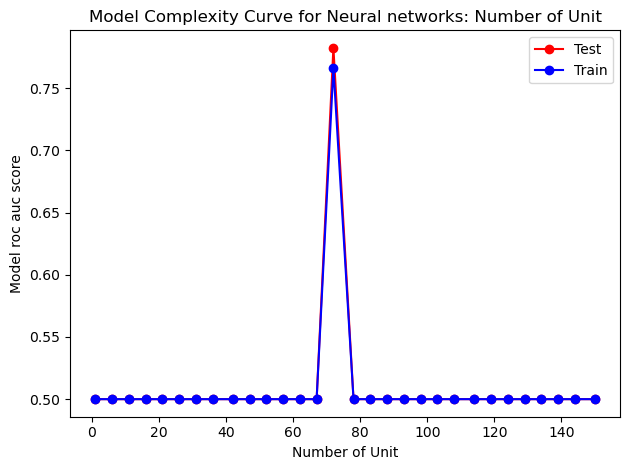

Per Hyperparameter tuning, best parameters are:
{'hidden_layer_sizes': 30, 'learning_rate_init': 0.01}
Model Evaluation Metrics Using Test Dataset
*****************************************************
F1 Score:  0.93
Accuracy:  0.91     AUC:       0.87
Precision: 0.87     Recall:    1.00
Model Training Time (s):   0.09408
Model Prediction Time (s): 0.00040

*****************************************************


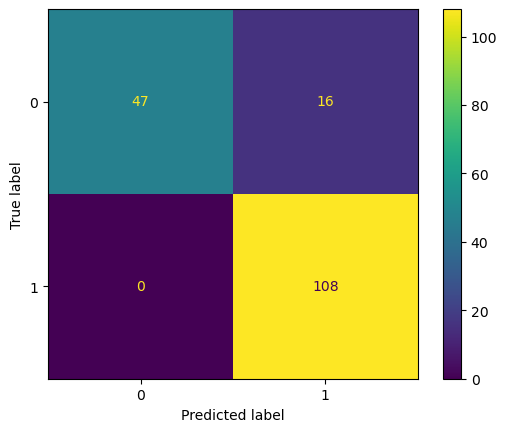

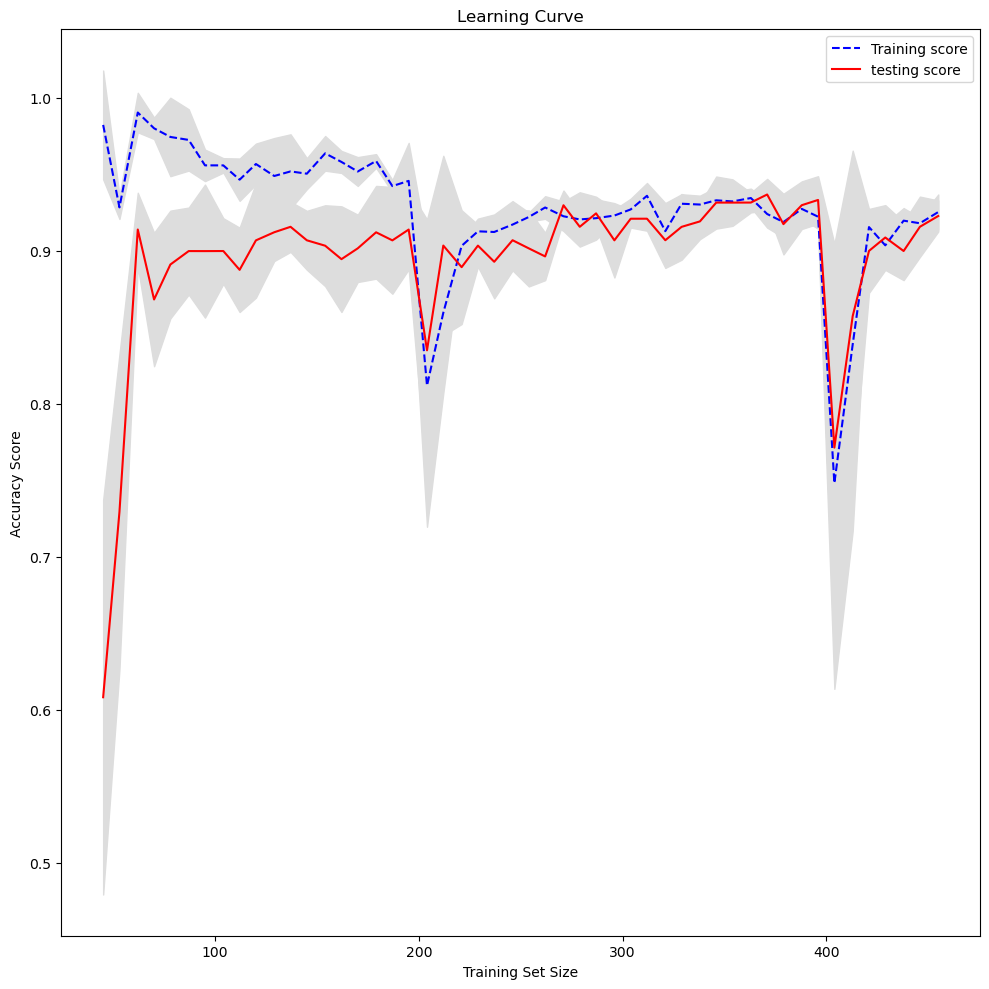

In [18]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data,breast_cancer.target,shuffle=True,test_size=0.3, random_state=42)

test = []
train = []
hlist = np.linspace(1,150,30).astype('int')
for i in hlist:         
        clf = MLPClassifier(hidden_layer_sizes=(i,), solver='adam', activation='logistic', 
                            learning_rate_init=0.05, random_state=100)
        clf.fit(X_train, y_train)
        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)
        test.append(roc_auc_score(y_test, y_pred_test))
        train.append(roc_auc_score(y_train, y_pred_train))

title="Model Complexity Curve for Neural networks: Number of Unit"       
perform_plot(hlist,test, train,title,'Model roc auc score','Number of Unit')  

h_units = [5, 10, 20, 30, 40, 50, 75, 100]
learning_rates = [0.01, 0.05, .1]
param_grid = {'hidden_layer_sizes': h_units, 'learning_rate_init': learning_rates}

net = GridSearchCV(estimator = MLPClassifier(solver='adam',activation='logistic',random_state=100),
                   param_grid=param_grid, cv=10)
net.fit(X_train, y_train)
print("Per Hyperparameter tuning, best parameters are:")
print(net.best_params_)

Best_NN_Classifier = MLPClassifier(hidden_layer_sizes=(net.best_params_['hidden_layer_sizes'],), 
                                         solver='adam', activation='logistic', 
                                         learning_rate_init=net.best_params_['learning_rate_init'], random_state=100)

final_classification(Best_NN_Classifier, X_train, y_train, X_test, y_test)

plot_learning_curve(Best_NN_Classifier, breast_cancer.data, breast_cancer.target)

# Boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

## Regression

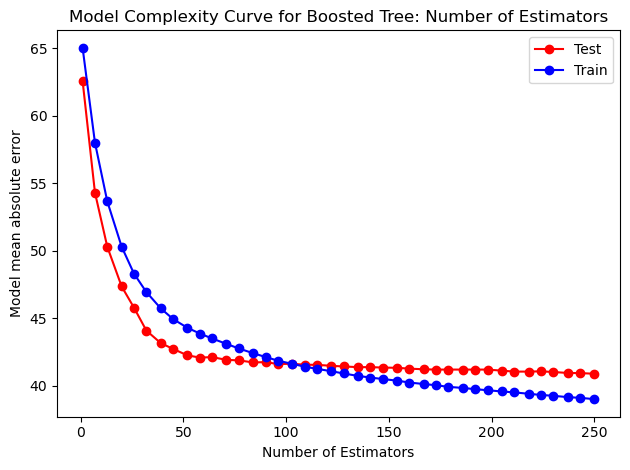

Per Hyperparameter tuning, best parameters are:
{'learning_rate': 0.0505, 'max_depth': 1, 'min_samples_leaf': 15, 'n_estimators': 100}
1) The model explains, 48.76 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 42.45
3) The R-Square score of the model is  0.49


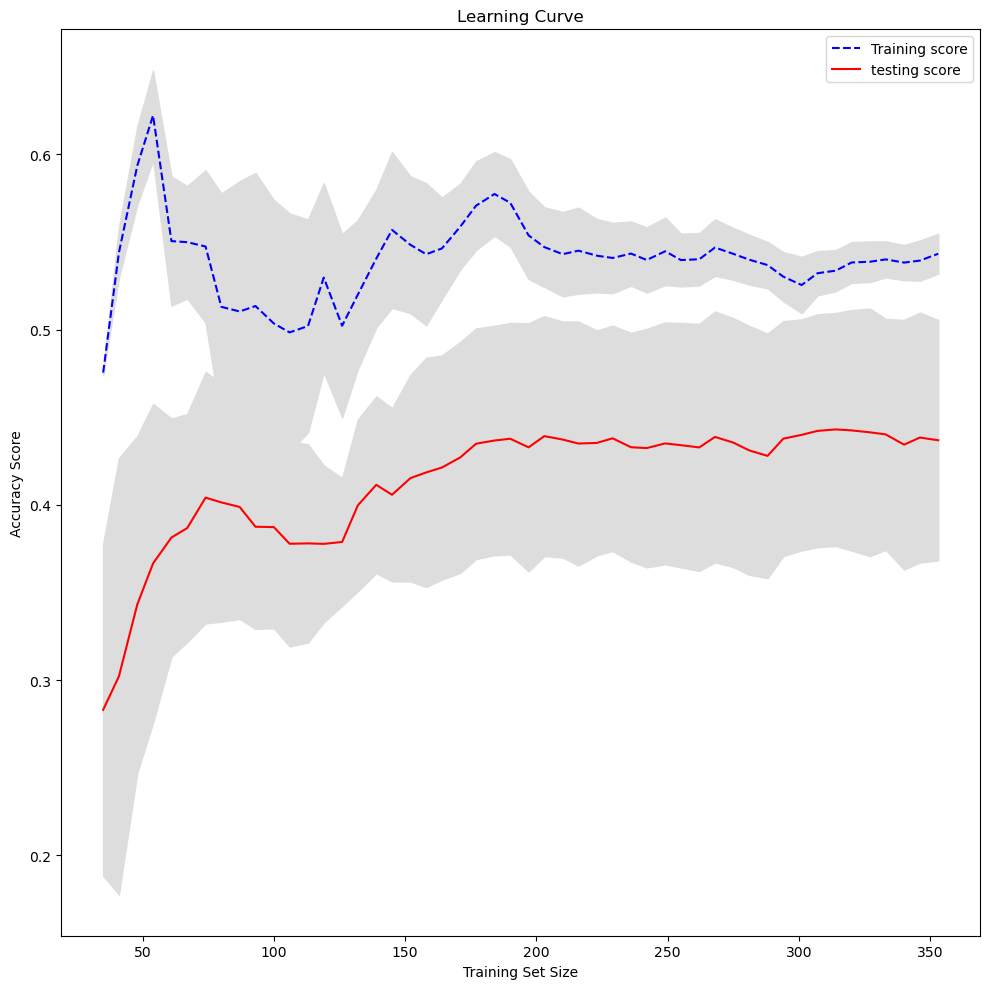

In [20]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,diabetes.target,shuffle=True,test_size=0.3, random_state=42)

test = []
train = []
n_estimators = np.linspace(1,250,40).astype('int')
for i in n_estimators:         
        clf = GradientBoostingRegressor(n_estimators=i, max_depth=int(3/2), 
                                         min_samples_leaf=int(50/2), random_state=100,)
        clf.fit(X_train, y_train)
        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)
        test.append(np.round(mt.mean_absolute_error(y_test,y_pred_test ),2))
        train.append(np.round(mt.mean_absolute_error(y_train,y_pred_train ),2))

title="Model Complexity Curve for Boosted Tree: Number of Estimators"       
perform_plot(n_estimators, test, train , title, 'Model mean absolute error', 'Number of Estimators') 

param_grid = {'min_samples_leaf': np.linspace(start_leaf_n,end_leaf_n,3).round().astype('int'),
                      'max_depth': np.arange(1,4),
                      'n_estimators': np.linspace(10,100,3).round().astype('int'),
                      'learning_rate': np.linspace(.001,.1,3)}

boost = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid=param_grid, cv=10)
boost.fit(X_train, y_train)
print("Per Hyperparameter tuning, best parameters are:")
print(boost.best_params_)

start_leaf_n = round(0.005*len(X_train))
end_leaf_n = round(0.05*len(X_train)) #leaf nodes of size [0.5%, 5% will be tested]

Best_Boosting_Regressor = GradientBoostingRegressor(max_depth=boost.best_params_['max_depth'], 
                                                            min_samples_leaf=boost.best_params_['min_samples_leaf'], 
                                                              n_estimators=boost.best_params_['n_estimators'], 
                                                            learning_rate=boost.best_params_['learning_rate'], random_state=100)

final_regression(Best_Boosting_Regressor, X_train, y_train, X_test, y_test)

plot_learning_curve(Best_Boosting_Regressor, diabetes.data, diabetes.target)

## Classification

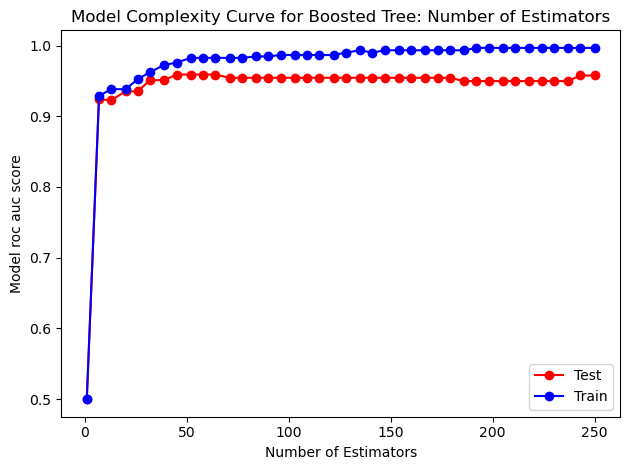

Per Hyperparameter tuning, best parameters are:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 11, 'n_estimators': 100}
Model Evaluation Metrics Using Test Dataset
*****************************************************
F1 Score:  0.97
Accuracy:  0.96     AUC:       0.95
Precision: 0.96     Recall:    0.97
Model Training Time (s):   0.24116
Model Prediction Time (s): 0.00049

*****************************************************


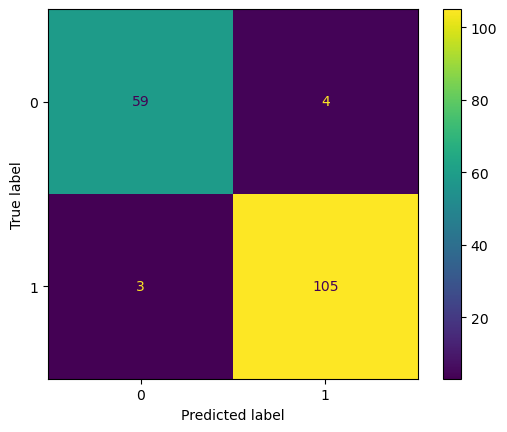

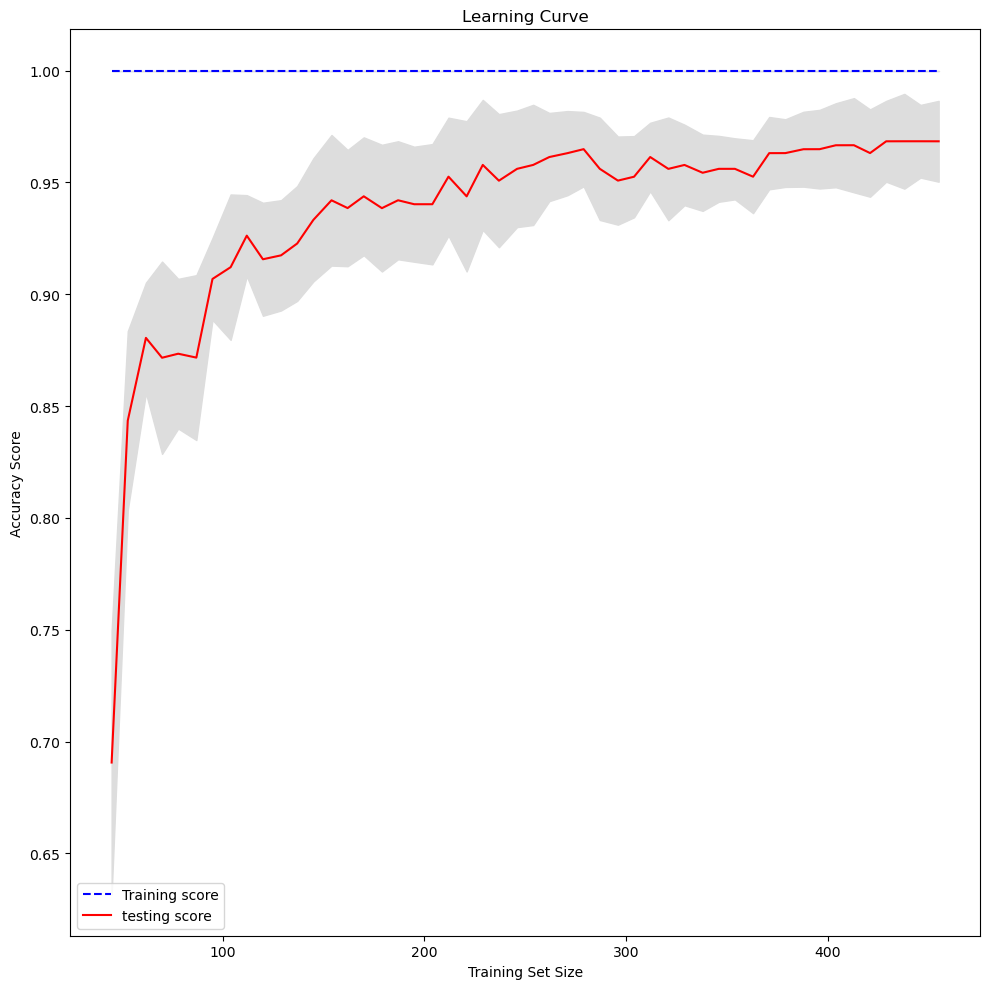

In [21]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data,breast_cancer.target,shuffle=True,test_size=0.3, random_state=42)

test = []
train = []
n_estimators = np.linspace(1,250,40).astype('int')
for i in n_estimators:         
        clf = GradientBoostingClassifier(n_estimators=i, max_depth=int(3/2), 
                                         min_samples_leaf=int(50/2), random_state=100)
        clf.fit(X_train, y_train)
        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)
        test.append(roc_auc_score(y_test, y_pred_test))
        train.append(roc_auc_score(y_train, y_pred_train))

title="Model Complexity Curve for Boosted Tree: Number of Estimators"       
perform_plot(n_estimators, test, train , title, 'Model roc auc score', 'Number of Estimators') 

start_leaf_n = round(0.005*len(X_train))
end_leaf_n = round(0.05*len(X_train)) #leaf nodes of size [0.5%, 5% will be tested]

param_grid = {'min_samples_leaf': np.linspace(start_leaf_n,end_leaf_n,3).round().astype('int'),
                      'max_depth': np.arange(1,4),
                      'n_estimators': np.linspace(10,100,3).round().astype('int'),
                      'learning_rate': np.linspace(.001,.1,3)}

boost = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid=param_grid, cv=10)
boost.fit(X_train, y_train)
print("Per Hyperparameter tuning, best parameters are:")
print(boost.best_params_)

Best_Boosting_Classifier = GradientBoostingClassifier(max_depth=boost.best_params_['max_depth'], 
                                                            min_samples_leaf=boost.best_params_['min_samples_leaf'], 
                                                              n_estimators=boost.best_params_['n_estimators'], 
                                                            learning_rate=boost.best_params_['learning_rate'], random_state=100)

final_classification(Best_Boosting_Classifier, X_train, y_train, X_test, y_test)
plot_learning_curve(Best_Boosting_Classifier, breast_cancer.data, breast_cancer.target)

# Support Vector Machines

In [22]:
from sklearn import svm

## Regression

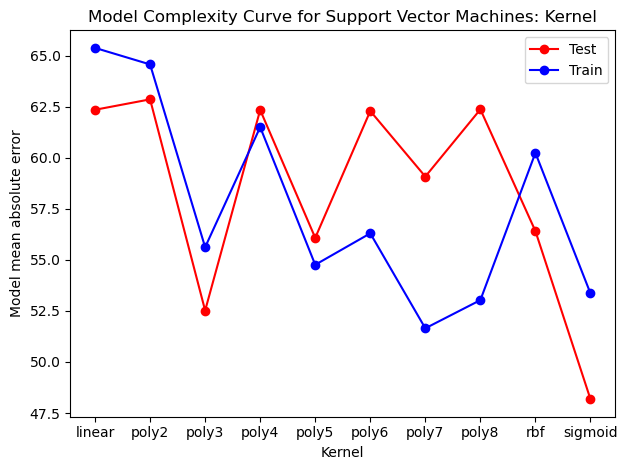

Per Hyperparameter tuning, best parameters are:
{'C': 10.0, 'gamma': 10}
1) The model explains, 49.52 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 41.6
3) The R-Square score of the model is  0.49


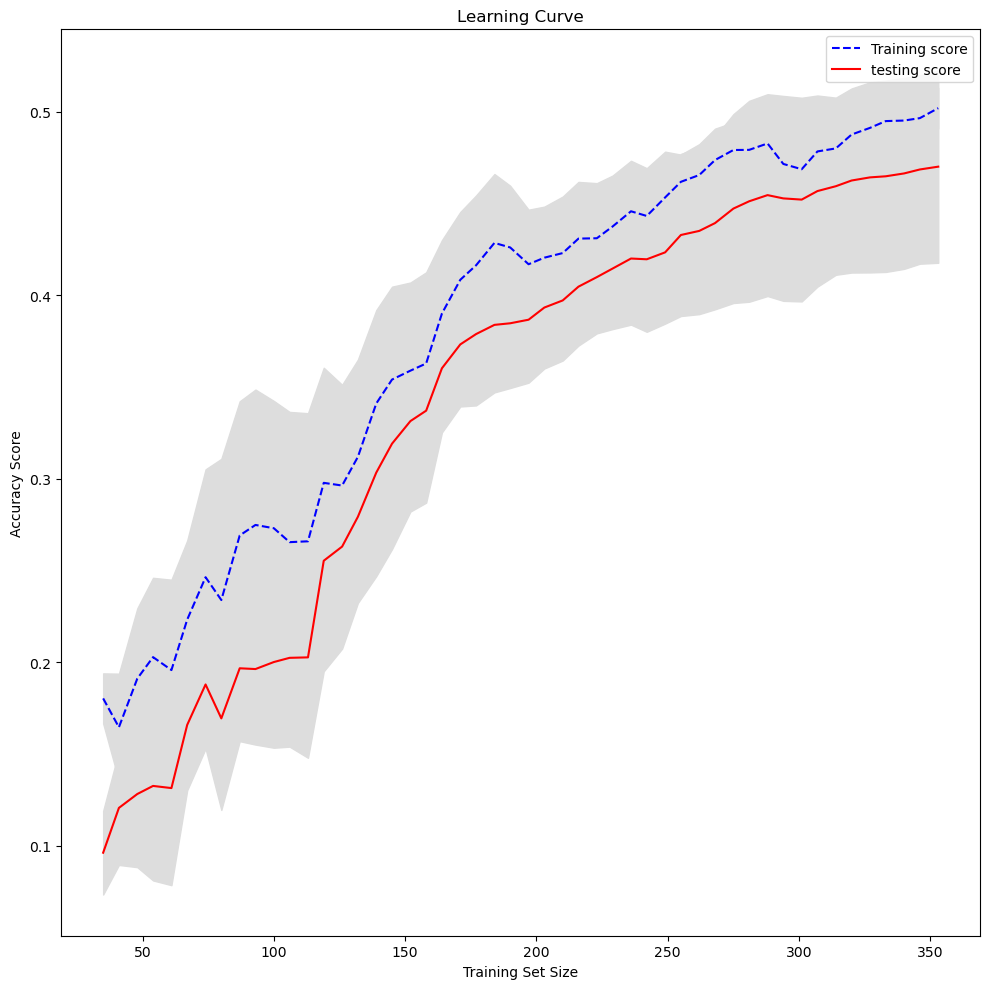

In [23]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,diabetes.target,shuffle=True,test_size=0.3, random_state=42)

test = []
train = []
kernel_func = ['linear','poly','rbf','sigmoid']
for i in kernel_func:         
        if i == 'poly':
            for j in [2,3,4,5,6,7,8]:
                clf = svm.SVR(kernel=i, degree=j)
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                y_pred_train = clf.predict(X_train)
                test.append(np.round(mt.mean_absolute_error(y_test,y_pred_test ),2))
                train.append(np.round(mt.mean_absolute_error(y_train,y_pred_train ),2))

        else:    
            clf = svm.SVR(kernel=i)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            test.append(np.round(mt.mean_absolute_error(y_test,y_pred_test ),2))
            train.append(np.round(mt.mean_absolute_error(y_train,y_pred_train ),2))

xvals = ['linear','poly2','poly3','poly4','poly5','poly6','poly7','poly8','rbf','sigmoid']
title="Model Complexity Curve for Support Vector Machines: Kernel"       
perform_plot(xvals, test,train,title,'Model mean absolute error','Kernel') 

Cs = [1e-4, 1e-3, 1e-2, 1e01, 1]
gammas = [1,10,100]
param_grid = {'C': Cs, 'gamma': gammas}

clf = GridSearchCV(estimator = svm.SVR(kernel='rbf'),
                   param_grid=param_grid, cv=10)
clf.fit(X_train, y_train)
print("Per Hyperparameter tuning, best parameters are:")
print(clf.best_params_)

Best_svm = svm.SVR(C=clf.best_params_['C'], 
                                            gamma=clf.best_params_['gamma'], 
                                           kernel='rbf')

final_regression(Best_svm, X_train, y_train, X_test, y_test)

plot_learning_curve(Best_svm, diabetes.data, diabetes.target)

## Classification

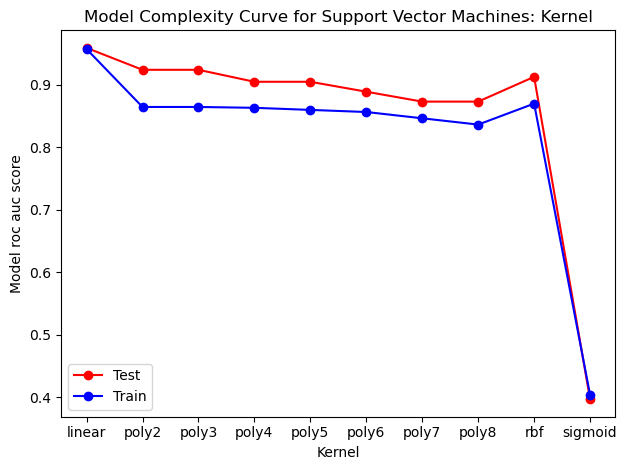

Per Hyperparameter tuning, best parameters are:
{'C': 0.0001, 'gamma': 1}
Model Evaluation Metrics Using Test Dataset
*****************************************************
F1 Score:  0.77
Accuracy:  0.63     AUC:       0.50
Precision: 0.63     Recall:    1.00
Model Training Time (s):   0.01015
Model Prediction Time (s): 0.00855

*****************************************************


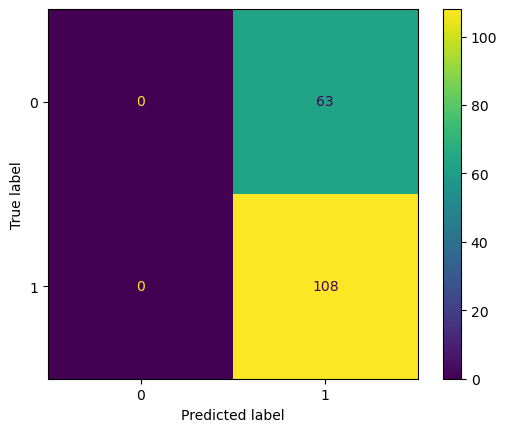

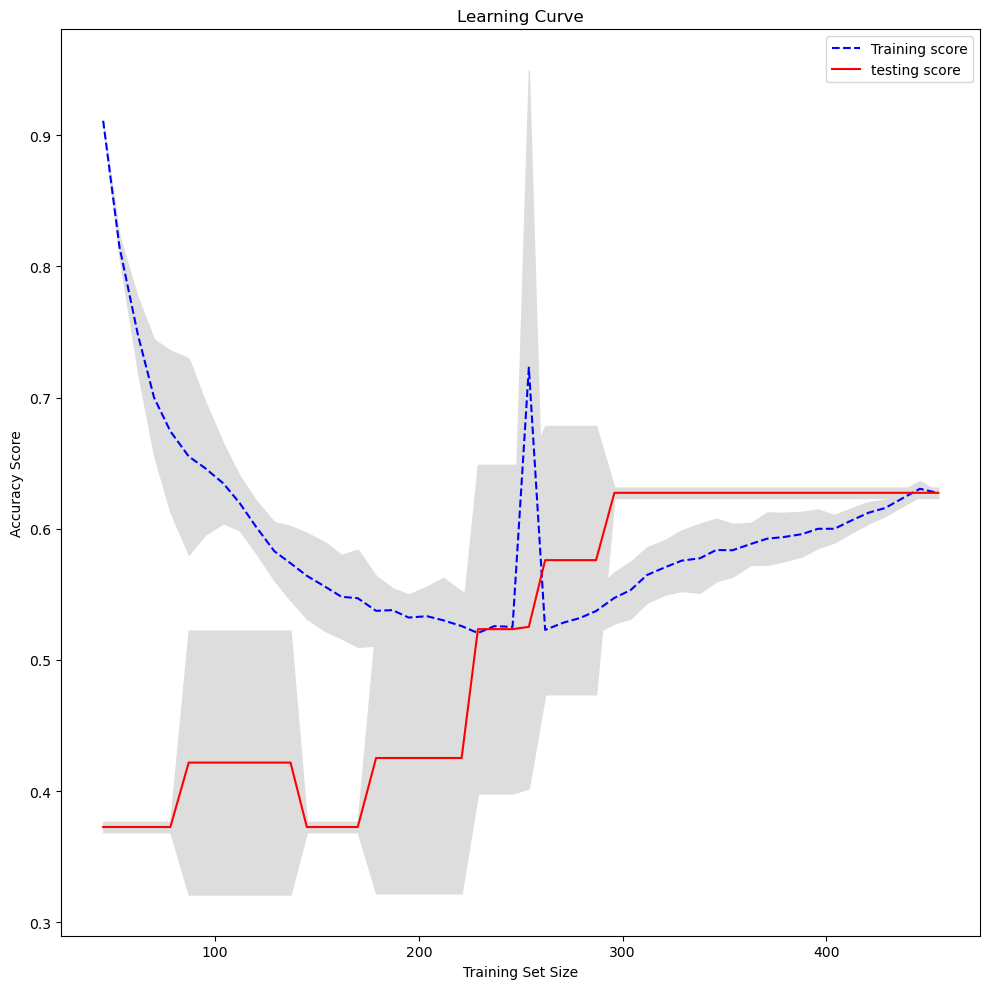

In [24]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data,breast_cancer.target,shuffle=True,test_size=0.3, random_state=42)

test = []
train = []
kernel_func = ['linear','poly','rbf','sigmoid']
for i in kernel_func:         
        if i == 'poly':
            for j in [2,3,4,5,6,7,8]:
                clf = svm.SVC(kernel=i, degree=j,random_state=100)
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                y_pred_train = clf.predict(X_train)
                test.append(roc_auc_score(y_test, y_pred_test))
                train.append(roc_auc_score(y_train, y_pred_train))
        else:    
            clf = svm.SVC(kernel=i, random_state=100)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            test.append(roc_auc_score(y_test, y_pred_test))
            train.append(roc_auc_score(y_train, y_pred_train))

xvals = ['linear','poly2','poly3','poly4','poly5','poly6','poly7','poly8','rbf','sigmoid']
title="Model Complexity Curve for Support Vector Machines: Kernel"       
perform_plot(xvals, test, train, title, 'Model roc auc score','Kernel') 

Cs = [1e-4, 1e-3, 1e-2, 1e01, 1]
gammas = [1,10,100]
param_grid = {'C': Cs, 'gamma': gammas}

clf = GridSearchCV(estimator = svm.SVC(kernel='rbf',random_state=100),
                   param_grid=param_grid, cv=10)
clf.fit(X_train, y_train)
print("Per Hyperparameter tuning, best parameters are:")
print(clf.best_params_)

Best_SVC = svm.SVC(C=clf.best_params_['C'], 
                                            gamma=clf.best_params_['gamma'], 
                                           kernel='rbf')

final_classification(Best_SVC, X_train, y_train, X_test, y_test)

plot_learning_curve(Best_SVC, breast_cancer.data, breast_cancer.target)

# k-Nearest Neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

## Regression

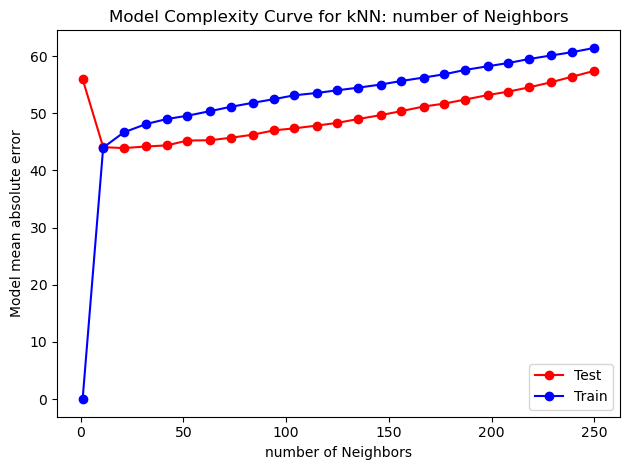

1) The model explains, 41.77 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 44.73
3) The R-Square score of the model is  0.42


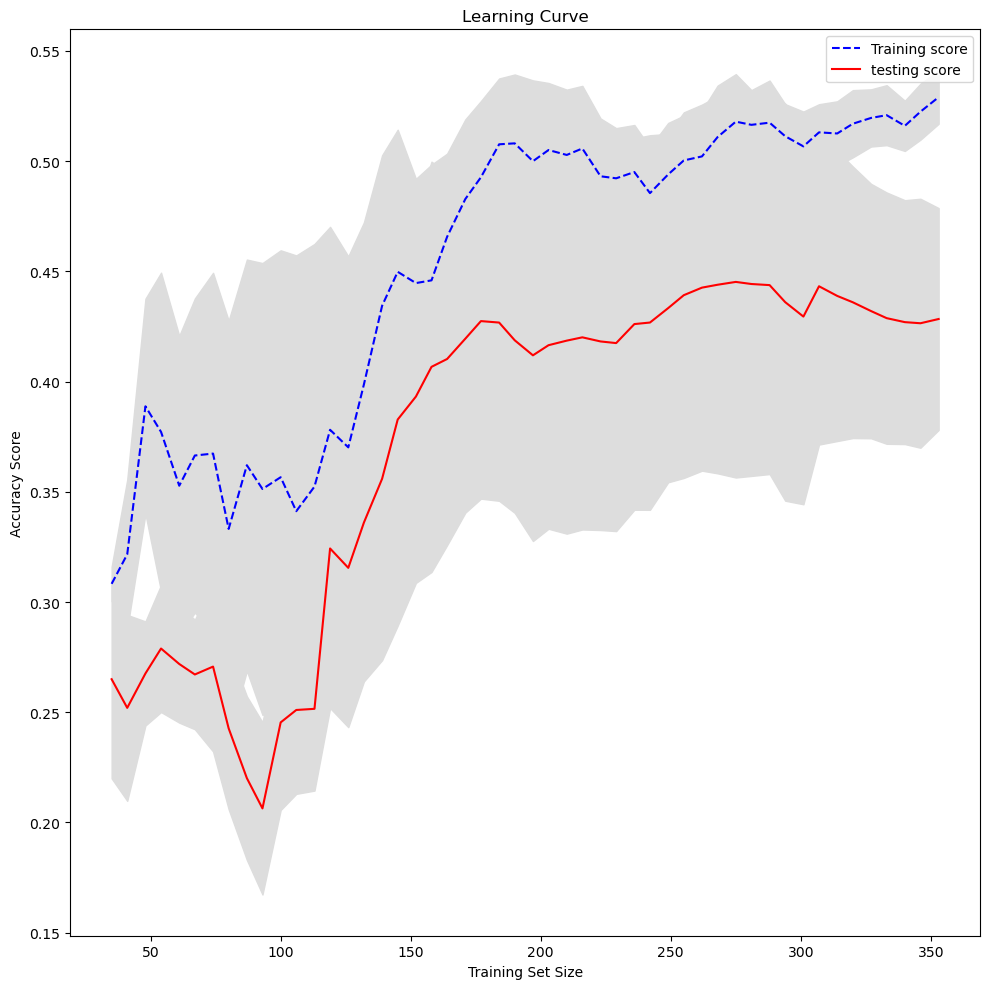

In [26]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,diabetes.target,shuffle=True,test_size=0.3, random_state=42)

# k-Nearest Neighbors
test = []
train = []
klist = np.linspace(1,250,25).astype('int')
for i in klist:
    clf = KNeighborsRegressor(n_neighbors=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    test.append(np.round(mt.mean_absolute_error(y_test,y_pred_test ),2))
    train.append(np.round(mt.mean_absolute_error(y_train,y_pred_train ),2))

title="Model Complexity Curve for kNN: number of Neighbors"       
perform_plot(klist, test,train,title,'Model mean absolute error','number of Neighbors') 

Best_KN = KNeighborsRegressor(n_neighbors=10, n_jobs=-1)

final_regression(Best_KN, X_train, y_train, X_test, y_test)

plot_learning_curve(Best_KN, diabetes.data, diabetes.target)

## Classification

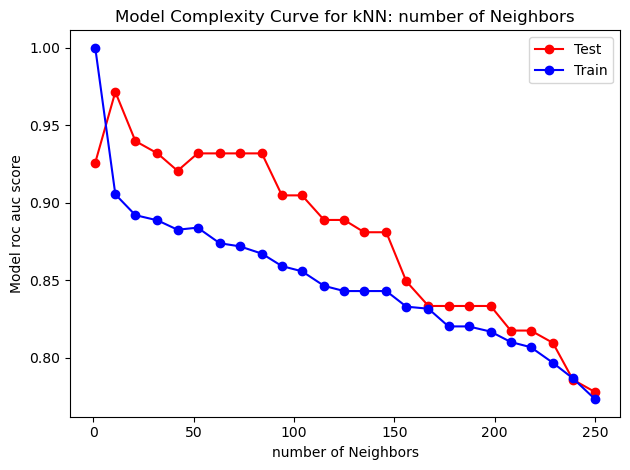

Model Evaluation Metrics Using Test Dataset
*****************************************************
F1 Score:  0.99
Accuracy:  0.98     AUC:       0.98
Precision: 0.98     Recall:    0.99
Model Training Time (s):   0.00069
Model Prediction Time (s): 0.01383

*****************************************************


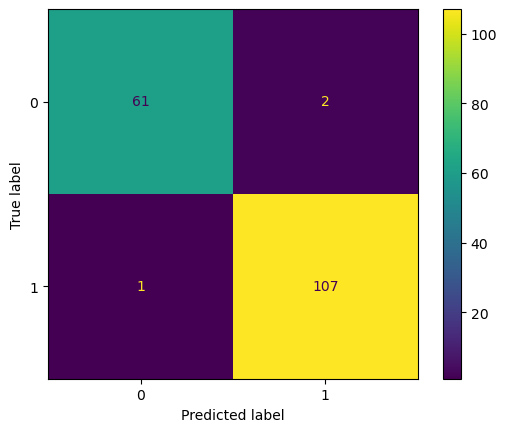

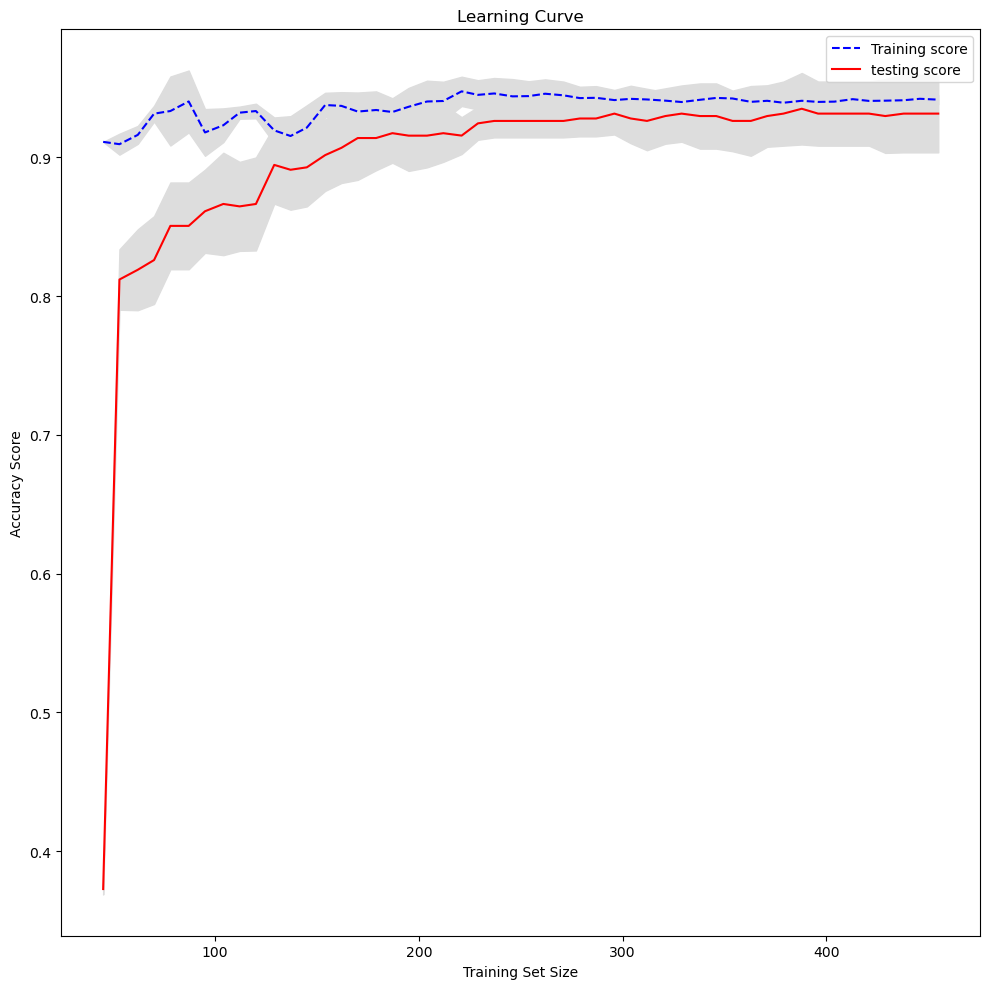

In [27]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data,breast_cancer.target,shuffle=True,test_size=0.3, random_state=42)

# k-Nearest Neighbors

test = []
train = []
klist = np.linspace(1,250,25).astype('int')
for i in klist:
    clf = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    test.append(roc_auc_score(y_test, y_pred_test))
    train.append(roc_auc_score(y_train, y_pred_train))

title="Model Complexity Curve for kNN: number of Neighbors"       
perform_plot(klist, test,train,title,'Model roc auc score','number of Neighbors') 

Best_KN = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
final_classification(Best_KN, X_train, y_train, X_test, y_test)
plot_learning_curve(Best_KN, breast_cancer.data, breast_cancer.target)